In [1]:
import pandas as pd      
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

from scipy.stats import skew

from sklearn.model_selection import cross_validate, cross_val_score
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("health_train.csv")

In [3]:
df

,age,sex,bmi,smoker,region,children,charges
0,21.000,male,25.745,no,northeast,2,3279.869
1,36.977,female,25.744,yes,southeast,3,21454.494
2,18.000,male,30.030,no,southeast,1,1720.354
3,37.000,male,30.677,no,northeast,3,6801.438
4,58.000,male,32.010,no,southeast,1,11946.626
...,...,...,...,...,...,...,...
2495,31.058,male,27.555,no,southeast,4,5889.104
2496,36.834,male,30.322,no,northeast,3,6788.534
2497,56.000,female,36.180,no,northwest,2,12401.747
2498,49.000,male,36.430,no,northwest,3,10376.295


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2500 non-null   float64
 1   sex       2500 non-null   object 
 2   bmi       2500 non-null   float64
 3   smoker    2500 non-null   object 
 4   region    2500 non-null   object 
 5   children  2500 non-null   int64  
 6   charges   2500 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 136.8+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,2500.000,2500.000,2500.000,2500.000
mean,39.003,30.575,2.488,12679.312
std,12.265,5.390,1.707,10593.270
min,18.000,15.960,0.000,1121.874
25%,28.846,26.718,1.000,5612.781
50%,39.350,30.200,2.000,9455.047
75%,48.689,34.046,4.000,14440.628
max,64.000,53.130,5.000,63770.428


In [6]:
for col in df.select_dtypes('object'):
    print(f"{col:<6}:", df[col].nunique())

sex   : 2
smoker: 2
region: 4


<AxesSubplot:>

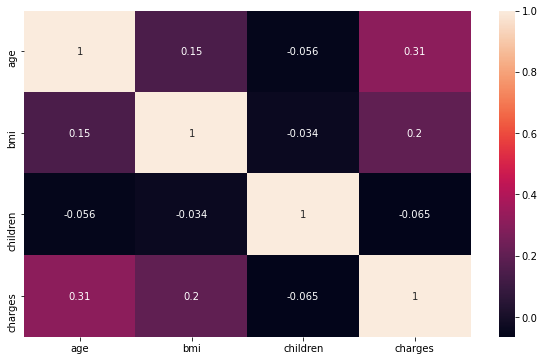

In [7]:
sns.heatmap(df.select_dtypes(include ="number").corr(), annot =True)

<AxesSubplot:xlabel='charges'>

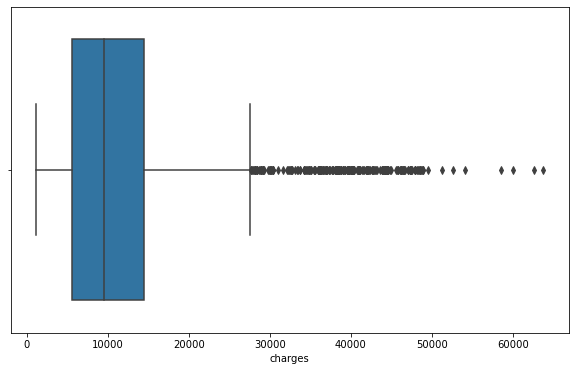

In [8]:
sns.boxplot(df.charges)

In [9]:
df.duplicated().value_counts()

False    2500
dtype: int64

In [10]:
df.columns

Index(['age', 'sex', 'bmi', 'smoker', 'region', 'children', 'charges'], dtype='object')

<AxesSubplot:xlabel='bmi'>

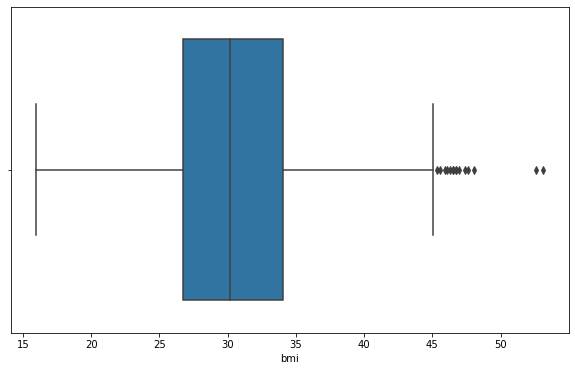

In [11]:
sns.boxplot(df.bmi)

In [12]:
df2 = df[df.bmi<45]

<AxesSubplot:xlabel='bmi'>

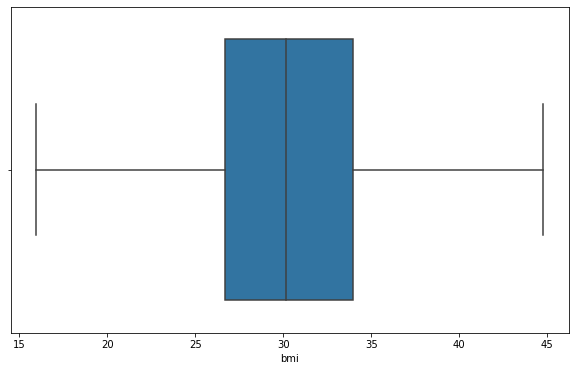

In [13]:
sns.boxplot(df2.bmi)

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2484 entries, 0 to 2499
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2484 non-null   float64
 1   sex       2484 non-null   object 
 2   bmi       2484 non-null   float64
 3   smoker    2484 non-null   object 
 4   region    2484 non-null   object 
 5   children  2484 non-null   int64  
 6   charges   2484 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 155.2+ KB


<AxesSubplot:>

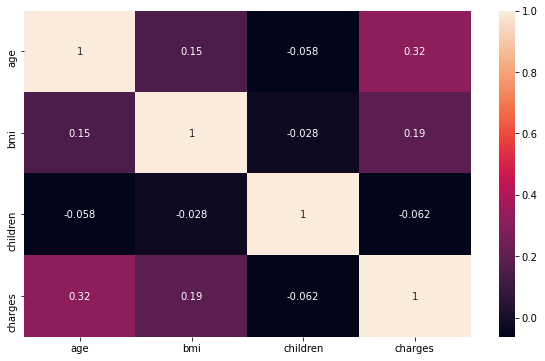

In [15]:
sns.heatmap(df2.select_dtypes(include ="number").corr(), annot =True)

<AxesSubplot:>

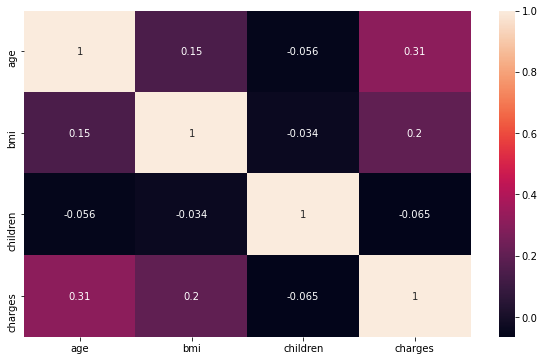

In [16]:
sns.heatmap(df.select_dtypes(include ="number").corr(), annot =True)

<AxesSubplot:xlabel='children'>

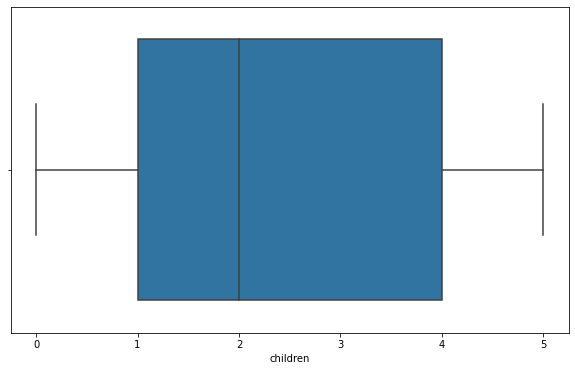

In [17]:
sns.boxplot(df.children)

<AxesSubplot:xlabel='age'>

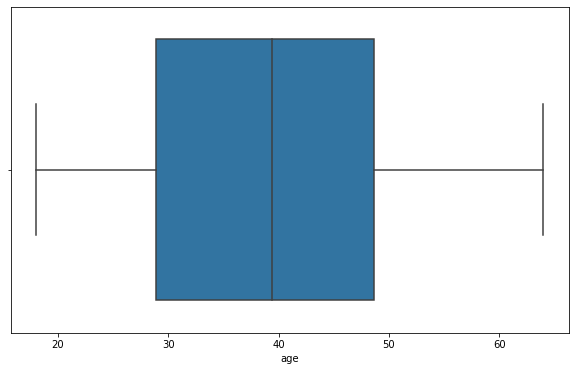

In [18]:
sns.boxplot(df.age)

In [19]:
df3 = pd.get_dummies(df2, drop_first =True)

In [20]:
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.000,25.745,2,3279.869,1,0,0,0,0
1,36.977,25.744,3,21454.494,0,1,0,1,0
2,18.000,30.030,1,1720.354,1,0,0,1,0
3,37.000,30.677,3,6801.438,1,0,0,0,0
4,58.000,32.010,1,11946.626,1,0,0,1,0


In [21]:
df3.shape

(2484, 9)

In [22]:
df3.isnull().any().any()

False

In [23]:
corr_by_charges = df3.corr()["charges"].sort_values()[:-1]
corr_by_charges

region_southwest   -0.134
children           -0.062
region_northwest   -0.042
region_southeast    0.043
sex_male            0.093
bmi                 0.195
age                 0.317
smoker_yes          0.768
Name: charges, dtype: float64

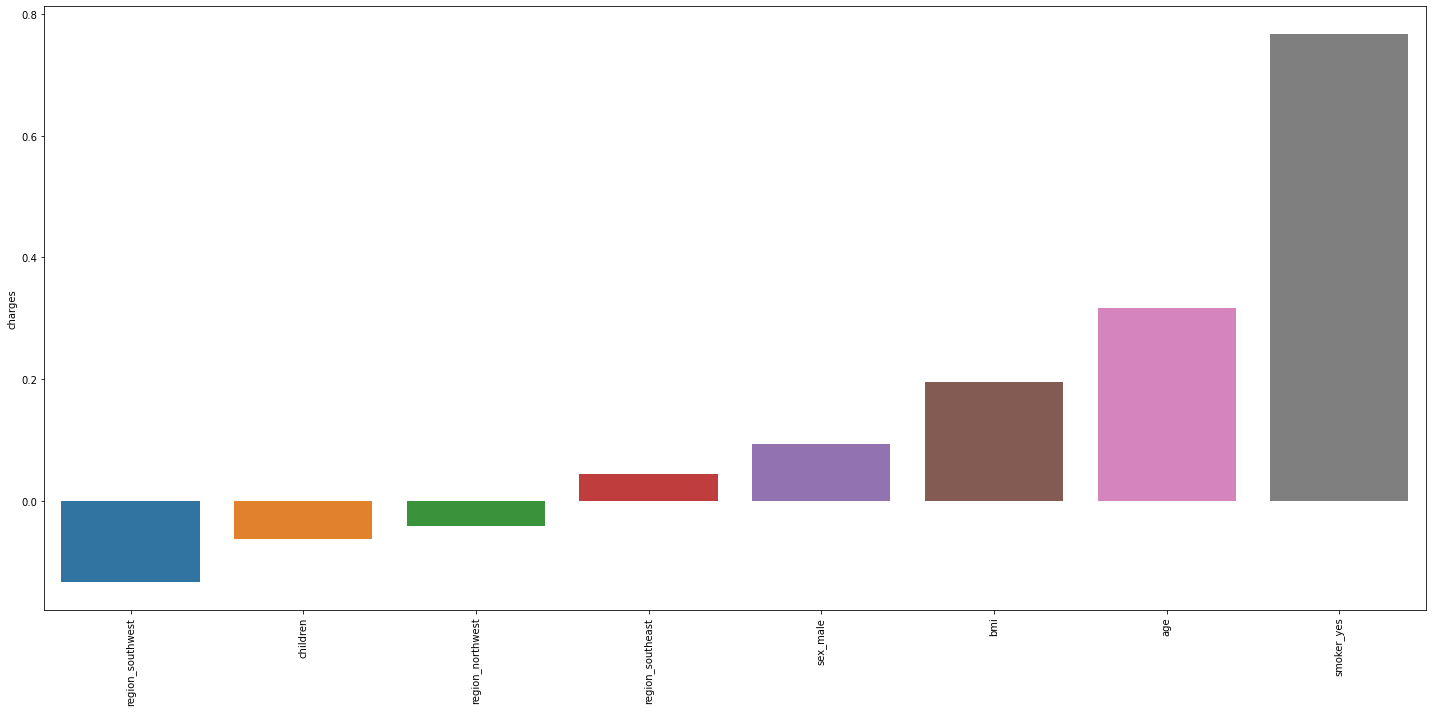

In [24]:
plt.figure(figsize = (20,10))
sns.barplot(x = corr_by_charges.index, y = corr_by_charges)
plt.xticks(rotation=90)
plt.tight_layout();

 # Test datası temizliği

In [25]:
test = pd.read_csv("health_test.csv")

In [26]:
test.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 451 entries, 0 to 450
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       451 non-null    float64
 1   sex       451 non-null    object 
 2   bmi       451 non-null    float64
 3   smoker    451 non-null    object 
 4   region    451 non-null    object 
 5   children  451 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 21.3+ KB


In [27]:
testdummy = pd.get_dummies(test, drop_first =True)

In [28]:
testdummy.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,39.297,29.978,4,1,0,1,0,0
1,40.368,27.928,5,0,0,0,1,0
2,32.882,41.577,5,1,0,0,0,1
3,62.000,30.495,2,0,0,1,0,0
4,32.476,30.323,4,1,1,0,0,0


In [29]:
df3.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.000,25.745,2,3279.869,1,0,0,0,0
1,36.977,25.744,3,21454.494,0,1,0,1,0
2,18.000,30.030,1,1720.354,1,0,0,1,0
3,37.000,30.677,3,6801.438,1,0,0,0,0
4,58.000,32.010,1,11946.626,1,0,0,1,0



# poly

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [123]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

poly_features = polynomial_converter.fit_transform(X)

In [124]:
poly_features.shape

(2484, 44)

# Train/Test

In [30]:
X= df3.drop(columns="charges")
y= df3.charges

In [125]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.2, random_state=101)

In [126]:
X_train.shape

(1987, 44)

In [127]:
X_test.shape

(497, 44)

In [128]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [129]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

scaler = MinMaxScaler()

In [130]:
scaler.fit(X_train)

MinMaxScaler()

In [131]:
X_train = scaler.transform(X_train)
X_train

array([[0.5       , 0.41964596, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       [0.5       , 0.733773  , 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.82608696, 0.4286706 , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.45257323, 0.24337288, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.02173913, 0.40402638, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.76086957, 0.82054842, 0.2       , ..., 1.        , 0.        ,
        0.        ]])

In [132]:
X_test = scaler.transform(X_test)
X_test

array([[0.76086957, 0.71641791, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.31343033, 0.7772883 , 1.        , ..., 0.        , 0.        ,
        1.        ],
       [0.96149833, 0.65568374, 0.2       , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.65217391, 0.71860083, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.54585599, 0.42923462, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.64815127, 0.47709182, 0.8       , ..., 0.        , 0.        ,
        0.        ]])

In [133]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [134]:
y_pred = lm.predict(X_test)
y_train_pred = lm.predict(X_train)

In [135]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.815,0.823
mae,2658.324,2673.186
mse,20374178.123,19526561.435
rmse,4513.776,4418.887


In [136]:
model = LinearRegression()
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10)

In [137]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,test_neg_mean_absolute_error,test_neg_mean_squared_error,test_neg_root_mean_squared_error
0,0.003,0.001,0.718,-2969.629,-26320992.822,-5130.399
1,0.003,0.001,0.782,-2941.435,-25479961.027,-5047.768
2,0.003,0.001,0.806,-2585.096,-17409914.672,-4172.519
3,0.002,0.001,0.800,-2895.542,-21890849.628,-4678.766
4,0.002,0.001,0.832,-2847.047,-22239027.410,-4715.827
5,0.002,0.001,0.844,-2646.853,-19734178.451,-4442.317
6,0.002,0.001,0.840,-2339.435,-17193408.243,-4146.493
7,0.003,0.001,0.723,-2708.649,-22418601.704,-4734.829
8,0.002,0.001,0.836,-2849.105,-22546803.153,-4748.347
9,0.003,0.001,0.828,-2552.461,-17547946.628,-4189.027


In [138]:
pd.DataFrame(scores).iloc[:, 2:].mean()

test_r2                                    0.801
test_neg_mean_absolute_error           -2733.525
test_neg_mean_squared_error        -21278168.374
test_neg_root_mean_squared_error       -4600.629
dtype: float64

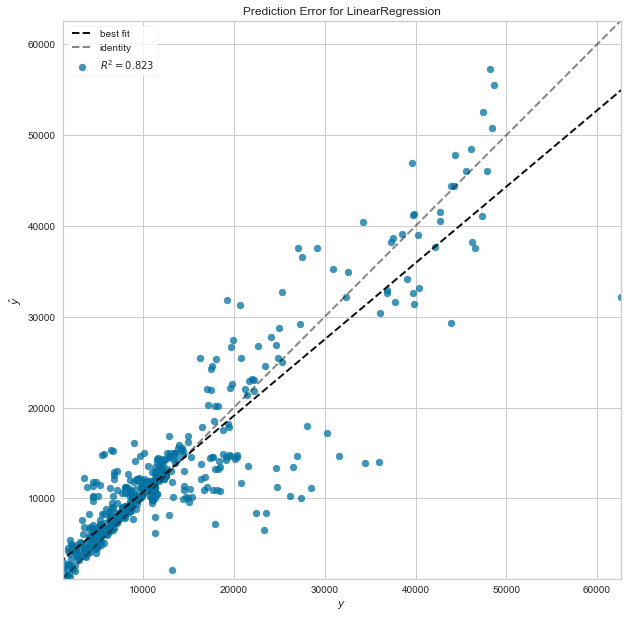

In [139]:
from yellowbrick.regressor import PredictionError
from yellowbrick.features import RadViz

visualizer = RadViz(size=(720, 3000))
model = LinearRegression()
visualizer = PredictionError(model)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();

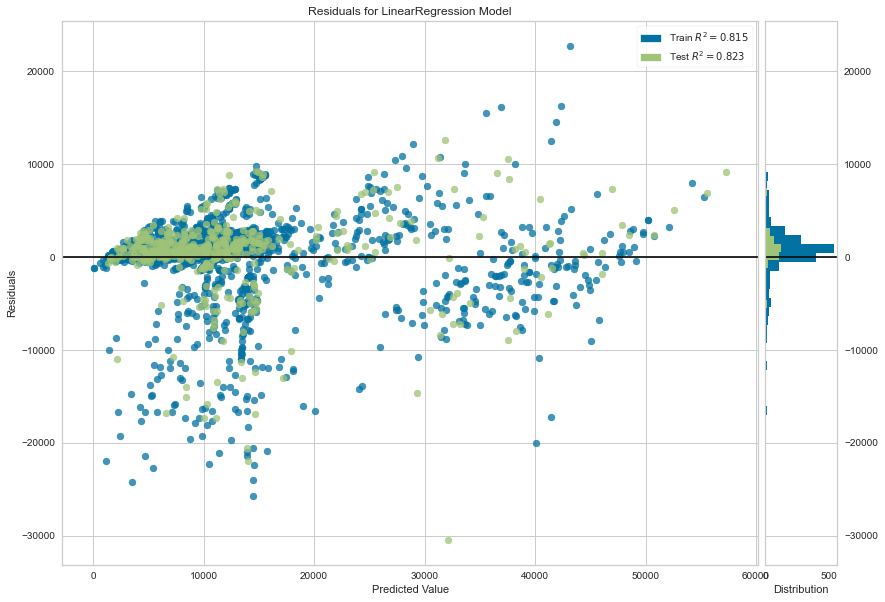

In [140]:
from yellowbrick.regressor import ResidualsPlot

visualizer = RadViz(size=(1000, 720))
model = LinearRegression()
visualizer = ResidualsPlot(model)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show();  

In [141]:
my_dict = { 'Actual': y_test, 'Pred': y_pred, 'Residual': y_test-y_pred }
compare = pd.DataFrame(my_dict)

In [142]:
comp_sample = compare.sample(20)
comp_sample

,Actual,Pred,Residual
1531,18191.734,13191.753,4999.980
2313,3535.178,4486.088,-950.910
953,2457.211,4467.069,-2009.858
2151,11475.544,14043.212,-2567.669
1954,2203.472,4681.359,-2477.887
1952,2904.088,3233.712,-329.624
1485,14310.497,14932.358,-621.861
190,9091.857,9983.087,-891.230
1009,18767.738,14879.087,3888.650
201,4022.565,6661.650,-2639.085


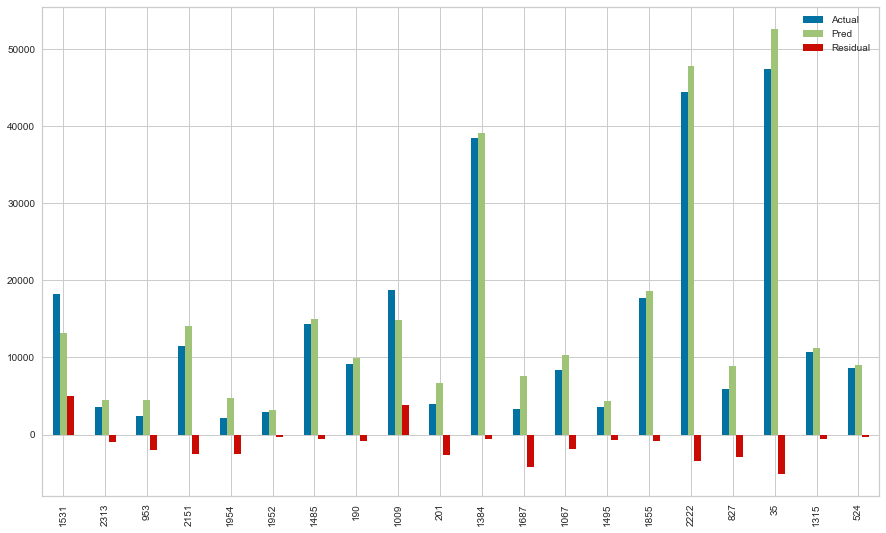

In [143]:
comp_sample.plot(kind='bar',figsize=(15,9))
plt.show()

# Ridge

In [144]:
from sklearn.linear_model import Ridge, RidgeCV

In [145]:
ridge_model = Ridge(random_state=101)

In [146]:
ridge_model.fit(X_train, y_train)

Ridge(random_state=101)

In [147]:
train_val(ridge_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.811,0.820
mae,2707.196,2700.666
mse,20861573.138,19911614.786
rmse,4567.447,4462.243


In [148]:
from sklearn.model_selection import GridSearchCV

In [149]:
alpha_space = np.linspace(0.01, 100, 100)
alpha_space

array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01, 2.627e+01, 2.728e+01, 2.829e+01, 2.930e+01,
       3.031e+01, 3.132e+01, 3.233e+01, 3.334e+01, 3.435e+01, 3.536e+01,
       3.637e+01, 3.738e+01, 3.839e+01, 3.940e+01, 4.041e+01, 4.142e+01,
       4.243e+01, 4.344e+01, 4.445e+01, 4.546e+01, 4.647e+01, 4.748e+01,
       4.849e+01, 4.950e+01, 5.051e+01, 5.152e+01, 5.253e+01, 5.354e+01,
       5.455e+01, 5.556e+01, 5.657e+01, 5.758e+01, 5.859e+01, 5.960e+01,
       6.061e+01, 6.162e+01, 6.263e+01, 6.364e+01, 6.465e+01, 6.566e+01,
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 

In [150]:
ridge_model = Ridge(random_state=101)

param_grid = {'alpha':alpha_space}

ridge_grid_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [151]:
ridge_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Ridge(random_state=101), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01,...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [152]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.825
mae,2653.755,2666.280
mse,20295242.420,19364198.898
rmse,4505.024,4400.477


# LAsso

In [153]:
from sklearn.linear_model import Lasso, LassoCV

In [154]:
lasso_model = Lasso(random_state=101)
lasso_model.fit(X_train, y_train)

Lasso(random_state=101)

In [155]:
train_val(lasso_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.825
mae,2649.534,2664.528
mse,20310701.015,19385011.489
rmse,4506.740,4402.841


In [156]:
lasso_model = Lasso(random_state=101)

param_grid = {'alpha':alpha_space}

lasso_grid_model = GridSearchCV(estimator=lasso_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [157]:
lasso_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=Lasso(random_state=101), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01,...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [158]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.825
mae,2649.418,2664.444
mse,20311284.711,19385413.400
rmse,4506.804,4402.887


# elastic

In [159]:
from sklearn.linear_model import ElasticNet

In [160]:
elastic_model = ElasticNet(random_state=101)
elastic_model.fit(X_train,y_train)

ElasticNet(random_state=101)

In [161]:
train_val(elastic_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.506,0.523
mae,5241.927,5258.593
mse,54485853.878,52771219.814
rmse,7381.453,7264.380


In [162]:
elastic_model = ElasticNet(random_state=101)

In [163]:
param_grid = {'alpha':[1.02, 2,  3, 4, 5, 7, 10, 11],
              'l1_ratio':[.5, .7, .9, .95, .99, 1]}

elastic_grid_model = GridSearchCV(estimator=elastic_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [164]:
elastic_grid_model.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=ElasticNet(random_state=101), n_jobs=-1,
             param_grid={'alpha': [1.02, 2, 3, 4, 5, 7, 10, 11],
                         'l1_ratio': [0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_root_mean_squared_error')

In [167]:
train_val(elastic_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.825
mae,2649.418,2664.444
mse,20311284.711,19385413.400
rmse,4506.804,4402.887


In [168]:
elastic_grid_model.best_params_

{'alpha': 1.02, 'l1_ratio': 1}

In [170]:
train_val(lasso_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.825
mae,2649.418,2664.444
mse,20311284.711,19385413.400
rmse,4506.804,4402.887


In [171]:
train_val(ridge_grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.816,0.825
mae,2653.755,2666.280
mse,20295242.420,19364198.898
rmse,4505.024,4400.477


In [172]:
train_val(lm, X_train, y_train, X_test, y_test)

,train,test
R2,0.815,0.823
mae,2658.324,2673.186
mse,20374178.123,19526561.435
rmse,4513.776,4418.887


# Final Model

In [181]:
final_scaler = MinMaxScaler()
X_scaled = final_scaler.fit_transform(poly_features)

In [182]:
ridge_model = Ridge(random_state=101)

param_grid = {'alpha':alpha_space}

final_model = GridSearchCV(estimator=ridge_model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1)

In [183]:
final_model.fit(X_scaled,y)

GridSearchCV(cv=10, estimator=Ridge(random_state=101), n_jobs=-1,
             param_grid={'alpha': array([1.000e-02, 1.020e+00, 2.030e+00, 3.040e+00, 4.050e+00, 5.060e+00,
       6.070e+00, 7.080e+00, 8.090e+00, 9.100e+00, 1.011e+01, 1.112e+01,
       1.213e+01, 1.314e+01, 1.415e+01, 1.516e+01, 1.617e+01, 1.718e+01,
       1.819e+01, 1.920e+01, 2.021e+01, 2.122e+01, 2.223e+01, 2.324e+01,
       2.425e+01, 2.526e+01,...
       6.667e+01, 6.768e+01, 6.869e+01, 6.970e+01, 7.071e+01, 7.172e+01,
       7.273e+01, 7.374e+01, 7.475e+01, 7.576e+01, 7.677e+01, 7.778e+01,
       7.879e+01, 7.980e+01, 8.081e+01, 8.182e+01, 8.283e+01, 8.384e+01,
       8.485e+01, 8.586e+01, 8.687e+01, 8.788e+01, 8.889e+01, 8.990e+01,
       9.091e+01, 9.192e+01, 9.293e+01, 9.394e+01, 9.495e+01, 9.596e+01,
       9.697e+01, 9.798e+01, 9.899e+01, 1.000e+02])},
             scoring='neg_root_mean_squared_error')

In [184]:
testdummy.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,39.297,29.978,4,1,0,1,0,0
1,40.368,27.928,5,0,0,0,1,0
2,32.882,41.577,5,1,0,0,0,1
3,62.000,30.495,2,0,0,1,0,0
4,32.476,30.323,4,1,1,0,0,0


In [185]:
polynomial_converter = PolynomialFeatures(degree=2, include_bias=False)

poly_test = polynomial_converter.fit_transform(testdummy)

In [186]:
poly_test = final_scaler.transform(poly_test)
poly_test

array([[0.46296861, 0.48657096, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.4862513 , 0.41539982, 1.        , ..., 1.        , 0.        ,
        0.        ],
       [0.32351225, 0.88916574, 1.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.70371196, 0.3750884 , 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.67829734, 0.53581535, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.67391304, 0.51856994, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [188]:
final_pred=final_model.predict(poly_test)

In [189]:
final_pred

array([10466.94788283,  8725.58597988,  6109.98305108, 16270.83867054,
       30211.90528473, 14690.78061409, 11921.21392283,  9935.43094876,
        9673.72735552,  1723.24840052,  9911.90674849,  3998.43895414,
       12697.02253584, 11698.59513462, 12993.37828652, 14708.33477268,
        8060.47300652,  4670.46996848,  2917.34070292, 35823.62874616,
        6240.34515219, 12011.66206087, 24290.24758419, 31675.40834356,
        7028.32326423,  7183.26307315, 10525.24826979,  2766.67837388,
        4470.84627757, 27457.34587604,  6210.64151368,  4888.10791795,
        5091.52929154, 10915.31359867, 35816.50276926,  6589.89198012,
       12295.86222513, 10441.13063348, 10917.42166461, 49213.92914671,
       16185.48445965, 12747.12858531, 24240.42630871, 49752.28831064,
        6581.32342569,  9671.98846185, 15244.29806393, 10022.09108788,
       15458.54720802, 11085.15531592, 12537.63503137,  3342.88375599,
       12524.34796659, 11639.34061222, 10376.25845553, 35212.63547993,
      

In [191]:
submission = pd.DataFrame(final_pred)

In [193]:
submission.to_csv("C9106.csv", index =False )